In [50]:
!pip install yfinance
#using yfinance api to get financial data

In [51]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
tickers = ["AAPL","TSLA","TATAMOTORS.NS","ACN"]

In [53]:
start = dt.datetime.today()-dt.timedelta(3650) #getting the data from 10 years ago.
end = dt.datetime.today()
cl_price = pd.DataFrame()

In [54]:
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [55]:
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

In [56]:
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock

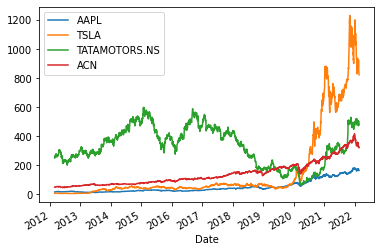

In [57]:
cl_price.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52eedef890>,
      dtype=object)

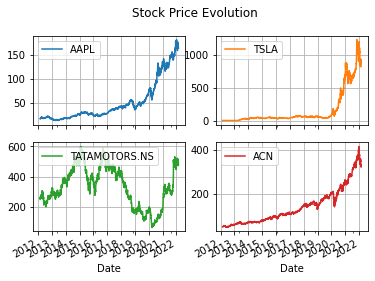

In [58]:
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True)

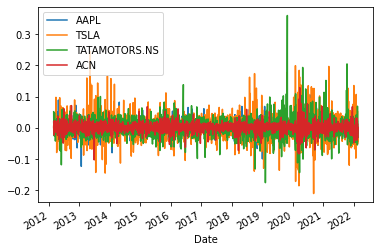

In [59]:
daily_return.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52eea19250>,
      dtype=object)

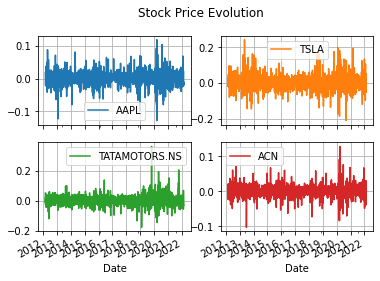

In [60]:
daily_return.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True)

In [61]:
# now suppose you invest $100 in a stock and got 10%,5%,10% on day1,day2,day3 respectively. So how would you calculate that?
100*(1.1)*(1.05)*(1.1) # This is called compounding/cummulating returns

127.05000000000003

In [62]:
# Now we do the same with the stocks
(1+daily_return).cumprod() 

,AAPL,TSLA,TATAMOTORS.NS,ACN
Date,,,,
2012-02-27,NaN,NaN,NaN,NaN
2012-02-28,1.018354,1.005651,1.051548,1.001676
2012-02-29,1.031726,0.993754,1.042316,0.997989
2012-03-01,1.035587,1.023498,1.027890,1.000335
2012-03-02,1.036937,1.012493,1.029621,0.998994
...,...,...,...,...
2022-02-15,10.746729,137.184711,2.017938,6.704385
2022-02-16,10.731802,137.327486,1.995716,6.792105
2022-02-17,10.503546,130.331645,2.001722,6.572093


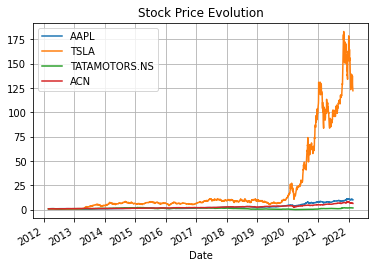

In [63]:
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)  